In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score

In [27]:
#Import dataframe from JSON file
jsonStr = "parameters_df.json"
df = pd.read_json(jsonStr, orient ='index')
print(df.head)

<bound method NDFrame.head of                                                    red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.7112  2.8076   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.7464  2.0908   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.6620  2.2704   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.8940  2.2452   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  3.0032  2.5404   
...                                                ...     ...     ...   
data/13666/1/13666_idx5_x901_y1101_class1.png   2.1980  2.3572  2.7020   
data/13666/1/13666_idx5_x1051_y1001_class1.png  2.6968  2.4552  2.5280   
data/13666/1/13666_idx5_x1051_y1151_class1.png  2.4272  2.8244  2.5152   
data/13666/1/13666_idx5_x1051_y1051_class1.png  2.5724  2.3860  2.5444   
data/13666/1/13666_idx5_x901_y1151_class1.png   2.7212  2.7648  3.0000   

                                                    gray  gray_var  edges  \
data

## Splitting in train and test set.

In [28]:
X= df[['red','green','blue','gray','gray_var','edges','ridges']]
y=df['group']
  
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)

print('X_train : ')
print(X_train.head())
print(X_train.shape)
print('')
print('X_test : ')
print(X_test.head())
print(X_test.shape)
print('')
print('y_train : ')
print(y_train.head())
print(y_train.shape)
print('')
print('y_test : ')
print(y_test.head())
print(y_test.shape)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.125, shuffle=False)

#Split: 70% train, 10% validation and 20% test.

X_train : 
                                                   red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.7112  2.8076   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.7464  2.0908   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.6620  2.2704   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.8940  2.2452   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  3.0032  2.5404   

                                                    gray  gray_var  edges  \
data/12910/0/12910_idx5_x3001_y701_class0.png   0.755730  0.003960     83   
data/12910/0/12910_idx5_x1501_y401_class0.png   0.483340  0.009377    350   
data/12910/0/12910_idx5_x2251_y1101_class0.png  0.799321  0.001401     14   
data/12910/0/12910_idx5_x2551_y1151_class0.png  0.824825  0.001107      0   
data/12910/0/12910_idx5_x2001_y101_class0.png   0.675241  0.005805    187   

                                                ridges  
data/12910/0/12910_idx5_

## Single decision tree classifier

Accuracy for max_depth of 1 is: 0.695598281975152
Accuracy for max_depth of 3 is: 0.7938946700873425
Accuracy for max_depth of 5 is: 0.8083364561413623
Accuracy for max_depth of 7 is: 0.8090571041480499
Accuracy for max_depth of 9 is: 0.809460667031795
Accuracy for max_depth of 11 is: 0.8057132973970194
Accuracy for max_depth of 13 is: 0.800034591104321
Accuracy for max_depth of 15 is: 0.7900319967714969
Accuracy for max_depth of 17 is: 0.7770026808105849
Accuracy for max_depth of 19 is: 0.7659335274278631
Accuracy for max_depth of 21 is: 0.7558444553342365
Accuracy for max_depth of 23 is: 0.7440834798650947
Accuracy for max_depth of 25 is: 0.7374535182035686
Accuracy for max_depth of 27 is: 0.7343403188146782
Accuracy for max_depth of 29 is: 0.7301893862961575
Accuracy for max_depth of 31 is: 0.727479749791012
Accuracy for max_depth of 33 is: 0.7267014499437895
Accuracy for max_depth of 35 is: 0.7251736761696117
Accuracy for max_depth of 37 is: 0.7236170764751665
Accuracy for max_dept

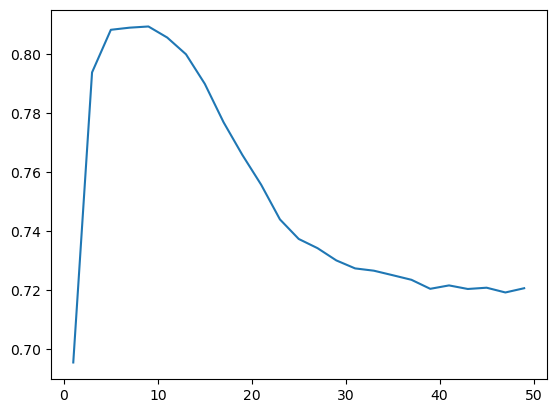

In [35]:
#Single decision tree with different depths, to see what is proper.
acc_for_depths = []
step_size = 2

st = time.time()
for d in range(1,50,step_size):
    model = DecisionTreeClassifier(max_depth = d)
    model = model.fit(X_train, y_train)

    predicted_value = model.predict(X_val)
    #print(predicted_value)

    #To plot the actual decision tree
    #tree.plot_tree(model)

    zeroes = 0
    ones = 0

    for i in y_train:
        if i == 0:
            zeroes += 1
        else:
            ones += 1

    val = 1 - ((zeroes/70)*(zeroes/70) + (ones/70)*(ones/70))
    #print("Gini :", val)

    match = 0
    UnMatch = 0

    for j in range(len(predicted_value)):
        if predicted_value[j] == y_val[j]:
            match += 1
        else:
            UnMatch += 1

    accuracy = match/len(predicted_value)
    acc_for_depths.append(accuracy)
    print(f'Accuracy for max_depth of {d} is: {accuracy}')
    
et = time.time()
elapsed_time = et - st
print(f'Execution time: {elapsed_time}s')
    
plt.plot(range(1,50,step_size), acc_for_depths)
plt.show()
#Observing in the plot that max_depth = 10 gives the highest accuracy when validating.

#ConfusionMatrixDisplay(confusion_matrix(y_test, predicted_value)).plot()

## Random forest classifier

Accuracy for max_depth of 1 is: 0.768499034331671
Accuracy for max_depth of 3 is: 0.790435559655242
Accuracy for max_depth of 5 is: 0.7987662506125508
Accuracy for max_depth of 7 is: 0.802888357210804
Accuracy for max_depth of 9 is: 0.8086247153440373
Accuracy for max_depth of 11 is: 0.8121703035369404
Accuracy for max_depth of 13 is: 0.8120549998558704
Accuracy for max_depth of 15 is: 0.8131215589057681
Accuracy for max_depth of 17 is: 0.8135539477097806
Accuracy for max_depth of 19 is: 0.8121703035369404
Accuracy for max_depth of 21 is: 0.8106713556830302
Accuracy for max_depth of 23 is: 0.8105848779222277
Accuracy for max_depth of 25 is: 0.8103254446398201
Accuracy for max_depth of 27 is: 0.8090859300683174
Accuracy for max_depth of 29 is: 0.8077022858954772
Accuracy for max_depth of 31 is: 0.8089418004669799
Accuracy for max_depth of 33 is: 0.8092012337493875
Accuracy for max_depth of 35 is: 0.8082788043008273
Accuracy for max_depth of 37 is: 0.8091724078291199
Accuracy for max_dep

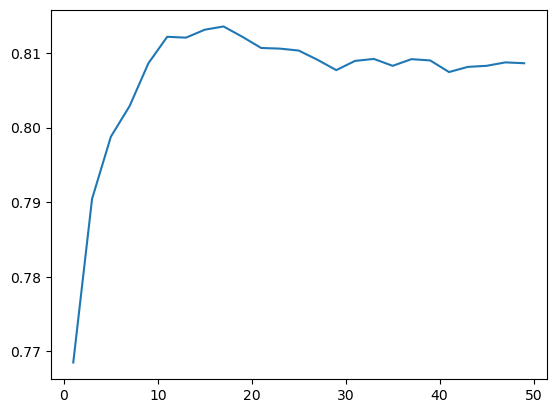

In [37]:
#Random forest classification with different values for max_depth
acc_for_depths = []
step_size = 2
for i in range(1,50,step_size):
    regressor = RandomForestClassifier(random_state = 0, 
                                       max_depth = i, 
                                       oob_score=True, 
                                       max_features="sqrt")

    # fit the regressor with x and y data
    regressor.fit(X_train, y_train) 

    y_pred = regressor.predict(X_val)  # test the output by changing values
    #print(y_pred)

    #print("accuracy on training set: %f" % regressor.score(X_train, y_train))
    #print("accuracy on validation set: %f" % regressor.score(X_val, y_val))

    # Create confusion matrix
    #confusion = confusion_matrix(y_val, y_pred)
    #ConfusionMatrixDisplay(confusion).plot()
    # Display accuracy score
    accuracy = accuracy_score(y_val, y_pred)
    print(f'Accuracy for max_depth of {i} is: {accuracy}')
    acc_for_depths.append(accuracy)
    
plt.plot(range(1,50,step_size), acc_for_depths)
plt.show()

0.8635067712045617


(0.0, 1.0)

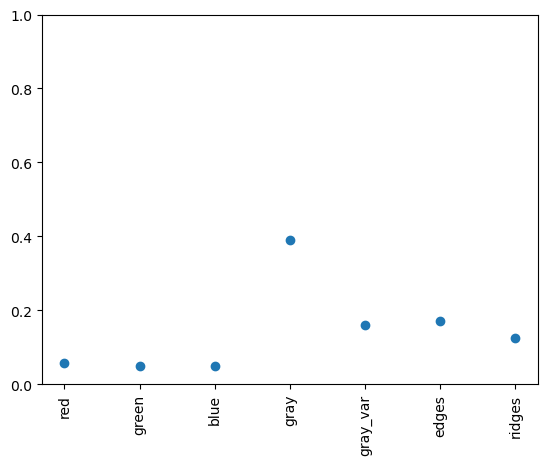

In [25]:
regressor = RandomForestClassifier(random_state = 0, 
                                       max_depth = 13, 
                                       oob_score=True, 
                                       max_features="sqrt")

# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test)  # test the output by changing values

# Create confusion matrix
#confusion = confusion_matrix(y_val, y_pred)
#ConfusionMatrixDisplay(confusion).plot()
# Display accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

plt.plot(regressor.feature_importances_, 'o')
plt.xticks(range(X_val.shape[1]), X_val.columns, rotation=90)
plt.ylim(0, 1)

### This part is not working yet.

In [17]:
# Visualising the Random Forest Regression results

# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
X_grid = np.arange(min(float(X_train)), max(float(X_train)), 0.01)

# reshape for reshaping the data into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value				
X_grid = X_grid.reshape((len(X_grid), 1))

# Scatter plot for original data
plt.scatter(x, y, color = 'blue')

# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid),color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

TypeError: float() argument must be a string or a number, not 'DataFrame'